"IMPLEMENTASI MODEL RESNET PADA CITRA PENYAKIT DAUN DENGAN METODE JARINGAN SYARAF KONVOLUSIONAL (CNN)" oleh Muhammad Jafar Shodiq (21120116130052)

# Mengimport Library dan Mendefinisikan Variabel

In [0]:
#mengimport direktori dari google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#menghitung total waktu jalannya program
import time
total_time = time.time()

#mengabaikan peringatan
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#membuat data latih dan data uji
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
import os
import cv2
import numpy as np
import random as rn
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#membuat model
from tensorflow.python.keras.applications.resnet import ResNet50, ResNet101, ResNet152
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.python.keras import optimizers

#visualisasi hasil
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix

Using TensorFlow backend.


In [0]:
Apple___Apple_scab_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/Apple___Apple_scab'
Apple___Black_rot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/Apple___Black_rot'
Grape___Black_rot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/Grape___Black_rot'
Grape___Esca_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/Grape___Esca_(Black_Measles)'
Grape___Leaf_blight_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
Potato___Early_blight_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/Potato___Early_blight'
Potato___Late_blight_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/Potato___Late_blight'
Tomato___Bacterial_spot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/Tomato___Bacterial_spot'
Tomato___Septoria_leaf_spot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/Tomato___Septoria_leaf_spot'
Tomato___Target_Spot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/Tomato___Target_Spot'

X=[]
Z=[]

NUM_CLASSES=10
CHANNELS=3
IMG_SIZE=224
BATCH_SIZE=32

TEST_SIZE=0.1
LEARNING_RATE=0.001
NUM_EPOCHS=20

RESNET_POOLING='avg'
RESNET_WEIGHTS='imagenet'
DENSE_LAYER_ACTIVATION='relu'
OUTPUT_DENSE_LAYER_ACTIVATION='softmax'
OBJECTIVE_FUNCTION='categorical_crossentropy'
LOSS_METRICS=['accuracy']

# Membuat Data Latih dan Data Uji

In [0]:
def assign_label(img,plantdisease_type):
    return plantdisease_type
    
def make_train_data(plantdisease_type,DIR):
    for img in tqdm(os.listdir(DIR)): #tqdm untuk progress bar
        label=assign_label(img,plantdisease_type)
        path=os.path.join(DIR,img)
        img=cv2.imread(path,cv2.IMREAD_COLOR) #membaca file gambar yang ada di masing-masing path
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #mengubah ukuran gambar menjadi 224x224
        
        X.append(np.array(img)) #menambahkan dan mengubah gambar menjadi array
        Z.append(str(label)) #menambahkan kelas/kategori

In [0]:
#menghitung waktu
make_data_time = time.time()
#memproses data yang akan digunakan
make_train_data('Keropeng_Apel',Apple___Apple_scab_DIR)
print(len(X))
make_train_data('Busuk_Hitam_Apel',Apple___Black_rot_DIR)
print(len(X))
make_train_data('Busuk_Hitam_Anggur',Grape___Black_rot_DIR)
print(len(X))
make_train_data('Esca_Anggur',Grape___Esca_DIR)
print(len(X))
make_train_data('Hawar_Daun_Anggur',Grape___Leaf_blight_DIR)
print(len(X))
make_train_data('Bercak_Kering_Kentang',Potato___Early_blight_DIR)
print(len(X))
make_train_data('Hawar_Daun_Kentang',Potato___Late_blight_DIR)
print(len(X))
make_train_data('Bercak_Bakteri_Tomat',Tomato___Bacterial_spot_DIR)
print(len(X))
make_train_data('Bercak_Septoria_Tomat',Tomato___Septoria_leaf_spot_DIR)
print(len(X))
make_train_data('Bercak_Coklat_Tomat',Tomato___Target_Spot_DIR)
print(len(X))
make_data_time_spent=time.time() - make_data_time

  0%|          | 0/500 [00:00<?, ?it/s]

500


  0%|          | 0/500 [00:00<?, ?it/s]

1000


  0%|          | 0/500 [00:00<?, ?it/s]

1500


  0%|          | 0/500 [00:00<?, ?it/s]

2000


  0%|          | 0/500 [00:00<?, ?it/s]

2500


  0%|          | 0/500 [00:00<?, ?it/s]

3000


  0%|          | 0/500 [00:00<?, ?it/s]

3500


  0%|          | 0/500 [00:00<?, ?it/s]

4000


  0%|          | 0/500 [00:00<?, ?it/s]

4500


100%|██████████| 500/500 [04:48<00:00,  1.73it/s]

5000


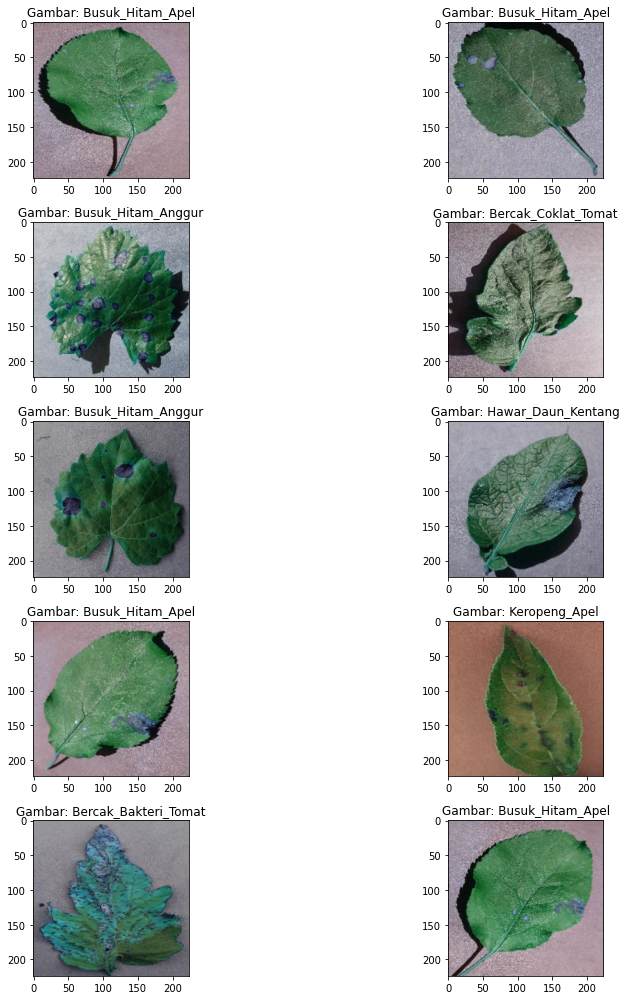

In [0]:
#menampilkan sampel secara acak
fig,ax=plt.subplots(5,2)
fig.set_size_inches(14,14)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Gambar: '+Z[l])     
plt.tight_layout()

In [0]:
#mengubah kelas/kategori menjadi angka 0-9
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,10)
#normalisasi nilai piksel dengan membagi semua nilai dengan 255
X=np.array(X)
X=X/255

In [0]:
#membagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=42)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4500, 224, 224, 3)
(500, 224, 224, 3)
(4500, 10)
(500, 10)


In [0]:
#menambahkan random seed
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

# Membuat Model

In [0]:
#mengunduh model resnet
resnet152_model= ResNet152(include_top=False, pooling=RESNET_POOLING, weights=RESNET_WEIGHTS, input_shape=(IMG_SIZE,IMG_SIZE,CHANNELS))

234700800/234698864 [==============================] - 4s 0us/step


In [0]:
#membangun model
model = Sequential()
model.add(resnet152_model)
model.add(BatchNormalization())
model.add(Dense(256, activation=DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(128, activation=DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(64, activation=DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(NUM_CLASSES, activation=OUTPUT_DENSE_LAYER_ACTIVATION))
#ResNet tidak perlu dilatih lagi karena sudah dilatih (pre-trained)
model.layers[0].trainable=False

In [0]:
#compile model
ADAM = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(optimizer=ADAM, loss=OBJECTIVE_FUNCTION, metrics=LOSS_METRICS)

In [0]:
#melihat lapisan, bentuk lapisan, dan jumlah parameter
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Model)            (None, 2048)              58370944  
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

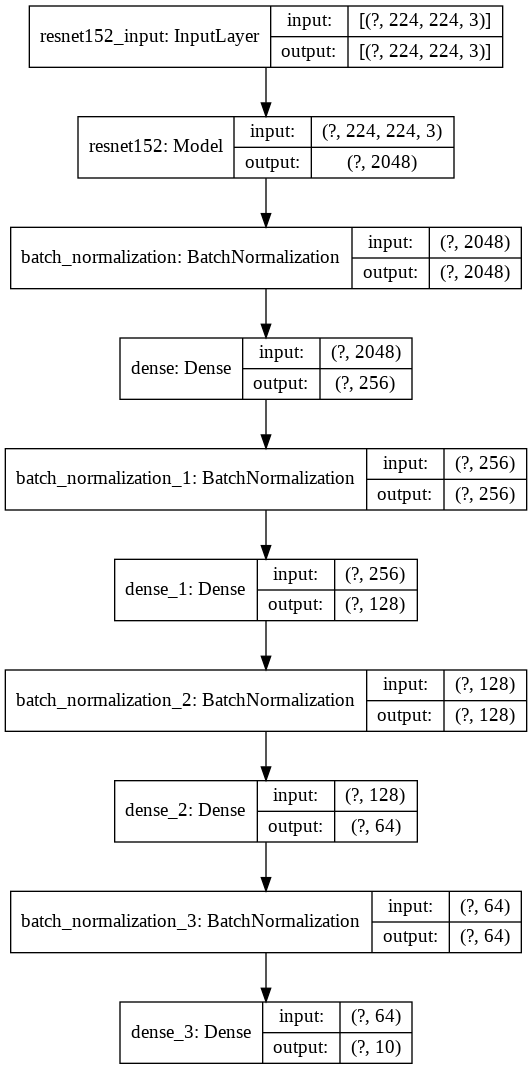

In [0]:
#menampilkan arsitektur model
keras.utils.plot_model(model, "model_architecture.png", show_shapes=True)

In [0]:
#menghitung waktu
train_time = time.time()
#melatih data
fit_history = model.fit(x_train,
                        y_train,
                        epochs=NUM_EPOCHS,
                        batch_size=BATCH_SIZE,
                        validation_data =(x_test,y_test))
train_time_spent=time.time() - train_time

Epoch 1/20
141/141 [==============================] - 710s 5s/step - loss: 1.3172 - accuracy: 0.5478 - val_loss: 2.3076 - val_accuracy: 0.1820
Epoch 2/20
141/141 [==============================] - 711s 5s/step - loss: 0.8657 - accuracy: 0.6989 - val_loss: 2.2229 - val_accuracy: 0.1780
Epoch 3/20
141/141 [==============================] - 713s 5s/step - loss: 0.7137 - accuracy: 0.7498 - val_loss: 1.4165 - val_accuracy: 0.4540
Epoch 4/20
141/141 [==============================] - 710s 5s/step - loss: 0.6190 - accuracy: 0.7807 - val_loss: 0.9588 - val_accuracy: 0.6700
Epoch 5/20
141/141 [==============================] - 708s 5s/step - loss: 0.5215 - accuracy: 0.8171 - val_loss: 0.6935 - val_accuracy: 0.7640
Epoch 6/20
141/141 [==============================] - 711s 5s/step - loss: 0.4924 - accuracy: 0.8227 - val_loss: 0.5996 - val_accuracy: 0.7940
Epoch 7/20
141/141 [==============================] - 711s 5s/step - loss: 0.4506 - accuracy: 0.8400 - val_loss: 0.6351 - val_accuracy: 0.7660

In [0]:
#mengevaluasi hasil latih
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Akurasi Data Uji:', test_acc)

16/16 - 66s - loss: 0.7611 - accuracy: 0.7980
Akurasi Data Uji: 0.7979999780654907


# Memvisualisasikan dan Menguji Model

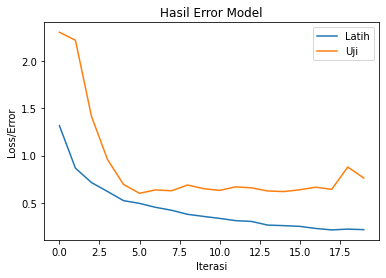

In [0]:
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('Hasil Error Model')
plt.ylabel('Loss/Error')
plt.xlabel('Iterasi')
plt.legend(['Latih', 'Uji'])
plt.show()

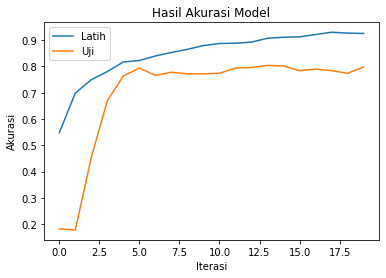

In [0]:
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('Hasil Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Iterasi')
plt.legend(['Latih', 'Uji'])
plt.show()

Report : 
                          precision    recall  f1-score   support

        (0)Keropeng_Apel       0.93      0.91      0.92        55
     (1)Busuk_Hitam_Apel       0.82      0.85      0.83        47
   (2)Busuk_Hitam_Anggur       0.82      0.91      0.86        54
          (3)Esca_Anggur       0.68      0.58      0.63        36
    (4)Hawar_Daun_Anggur       0.74      0.67      0.70        51
(5)Bercak_Kering_Kentang       0.85      0.76      0.80        54
   (6)Hawar_Daun_Kentang       0.71      0.84      0.77        44
 (7)Bercak_Bakteri_Tomat       0.91      0.84      0.88        51
(8)Bercak_Septoria_Tomat       0.68      0.71      0.70        45
  (9)Bercak_Coklat_Tomat       0.79      0.83      0.81        63

                accuracy                           0.80       500
               macro avg       0.79      0.79      0.79       500
            weighted avg       0.80      0.80      0.80       500



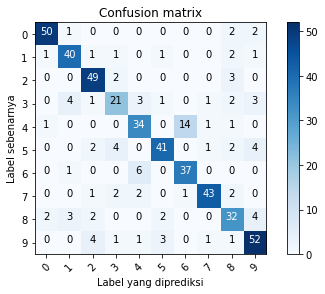

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label sebenarnya')
    plt.xlabel('Label yang diprediksi')

target_names=['(0)Keropeng_Apel', '(1)Busuk_Hitam_Apel', '(2)Busuk_Hitam_Anggur', '(3)Esca_Anggur', '(4)Hawar_Daun_Anggur', '(5)Bercak_Kering_Kentang', '(6)Hawar_Daun_Kentang', '(7)Bercak_Bakteri_Tomat', '(8)Bercak_Septoria_Tomat', '(9)Bercak_Coklat_Tomat']
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes=range(10))

print('Report : ')
print(classification_report(Y_true, Y_pred_classes, target_names=target_names))

#0:Keropeng Apel
#1:Busuk Hitam Apel
#2:Busuk Hitam Anggur
#3:Esca Anggur
#4:Hawar Daun Anggur
#5:Bercak Kering Kentang
#6:Hawar Daun Kentang
#7:Bercak Bakteri Tomat
#8:Bercak Septoria Tomat
#9:Bercak Coklat Tomat

In [0]:
total_time_spent=time.time() - total_time
#total waktu jalannya program
print('Waktu untuk membuat data latih dan data uji:', make_data_time_spent)
print('Waktu untuk melatih data:', train_time_spent)
print('Total waktu keseluruhan:', total_time_spent)

Waktu untuk membuat data latih dan data uji: 2786.0795335769653
Waktu untuk melatih data: 14393.422792434692
Total waktu keseluruhan: 17354.50431537628
